# Linear Regression

<p>In supervised learning, there is the goal of predicting an outcome based on a set of input measures. Linear regression takes a set of inputs $X$ and a set of outputs $y$, and models a linear relationship by which the input maximally explains the output. It predicts a target as a weighted sum of feature inputs, and the weight attached to each feature's inputs is called a coefficient. For a single instance, the relationship can be written as:</p>

<p>$$y = \beta_0 + \beta_1 x1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$$</p>
    <ul>
        <li>$y$ is the numeric response for the instance in question</li>
        <li>$\beta_0$ is an estimated intercept value</li>
        <li>$b_j$ is the estimated coefficient for the $j^th$ variable</li>
        <li>$\epsilon$ is random error that cannot be explained by the model</li>
    </ul>

## Simple Linear Regression

Let's start by importing some fundamental libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generating the Data

Then, generating some correlated data

In [2]:
N = 72

x = np.random.randn(N)
y = x + np.random.randn(N)

print(np.shape(x))
print(np.shape(y))

(72,)
(72,)


### Pre-Processing the Data

The sk-learn model we'll be using requires the second dimensions to be explicit, which we can achieve with <code>reshape()</code>

In [3]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(np.shape(x))
print(np.shape(y))

(72, 1)
(72, 1)


### Fitting the Model

Next, we fit the model and take a look at the learned coefficient and intercept

In [4]:
from sklearn import linear_model
model = linear_model.LinearRegression()
_ = model.fit(x,y)

print("yhat = " + str(model.intercept_[0]) + " + " +\
 str(model.coef_.T[0][0]) + " x1")

yhat = -0.011629229119974077 + 1.236545841532013 x1


## Interpretation

<p>Linear regression models are interpretable on a modular level via the coefficient weights, each of which has a confidence interval. An advantage to models that follow a regression formula is that they are highly interpretable. Another advantage is that their nature allows us to compute standard errors of the coefficients. Assumptions apply, but are often violated with little consequence. These assumptions include:</p>
<ul>
    <li>A linear (uncurved) effect</li>
    <li>A constant/stationary level of variance throughout the dataset (homoscedasticity)</li>
    <li>Independence of errors</li>
    <li>Lack of correlated features</li>
    <li>Normally distributed errors</li>
</ul>

### Predicting

We can predict upon the x variable as such:

In [5]:
pred = model.predict(x)
pred[0:5]

array([[-0.46850454],
       [ 0.74560355],
       [-1.32438398],
       [-1.93212803],
       [ 0.83412279]])

### Evaluating Results

##### Correlation

One way of evaluating results is by the correlation between the predictions and the actual y values. The function requires that we eliminate the second dimension of 1 that we made explicit, and this can be done using Numpy's squeeze function.

In [6]:
from scipy.stats import pearsonr
r = pearsonr(y.squeeze(),pred.squeeze())
r

PearsonRResult(statistic=0.7657079760340918, pvalue=4.712928369590563e-15)

The correlation is quite strong, at 70%, and the p-value shows significance. A nice feature of correlation is that it is a quantity scaled to be between 0 and 1. Other popular metrics include mean absolute error and mean squared error (as well as root mean squared error), demonstrated below.

##### Mean Absolute Error

In [7]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, pred)
print(mae)

0.9274526180871475


##### Mean Squared Error

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, pred)
print(mse)

1.1845084896688693


##### Root Mean Squared Error

In [9]:
rmse = np.sqrt(mse)
rmse

1.088351271267172

##### Plot Results

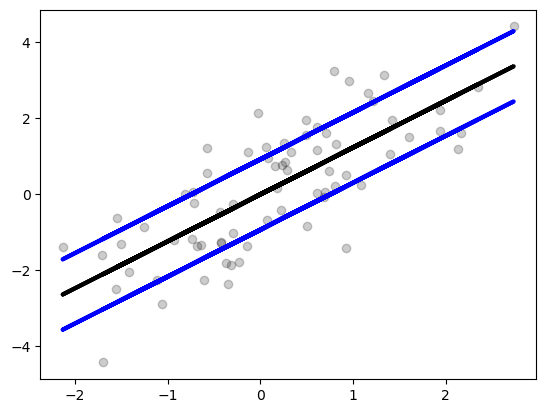

In [10]:
plt.scatter(x, y, color='black', alpha=0.2);
plt.plot(x, pred, color='black', linewidth=3);
plt.plot(x, pred + mae, color='blue', linewidth=3);
plt.plot(x, pred - mae, color='blue', linewidth=3);

# Multiple Linear Regression

When there are multiple independent variables, it is called multiple linear regression. sklearn's diabetes dataset will be used to demonstrate; below I will import and it and retrieve the description.

In [11]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

It can return the X and y variables separately using <code>return_X_y=True</code>

In [12]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

print(np.shape(diabetes_X))
print(np.shape(diabetes_y))

(442, 10)
(442,)


## Data Splitting

Models can be prone to overfitting, meaning they will perform highly on the training data but fail to generalize beyond the data they are trained on, unless properly tuned or augmented. Typically, a partition of the data called the training set is used to develop models; and the remainder of the data, the test set, is utilized at the conclusion of the activities for the purpose of getting an unbiased estimate of the model's performance.

We will set aside approximately 10% of the dataset, 44 points, to be the test set.

In [13]:
X_train = diabetes_X[:-44]
X_test = diabetes_X[-44:]

y_train = diabetes_y[:-44]
y_test = diabetes_y[-44:]

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(398, 10)
(398,)
(44, 10)
(44,)


### Fitting the Model to the Training Set

<p>Each coefficient reflects the effect of a change upon the dependent variable when all other variables are held constant. They are susceptible to scale, but are standardized if the data is standardized. An interaction term may be added as such:</p>

<p>$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + ...$$</p>

<p>However, interaction terms can be difficult to interpret, and should only be used when necessary.</p>

<p>Multiple regression is commonly accompanied by a feature selection method such as backward elimination or forward selection, which apply to modeling in general.

In [14]:
model = linear_model.LinearRegression()
_ = model.fit(X_train,y_train)
model.coef_

array([   0.92891559, -238.50198325,  519.89110807,  303.04397319,
       -756.32531098,  433.01009122,   99.81896609,  213.40218236,
        692.49862595,   98.00129273])

### Predicting

In [15]:
y_train_pred = model.predict(X_train)

### Evaluating Results

##### Coefficient of Determination ($R^2$)

<p>If measuring the relationship between one $x$ variable and a $y$ variable, then correlation is a measure of whether the coefficient (and intercept) is meaningful; but in the case of multiple regression, the coefficient of determination $R^2$ should be used. The squaring is necessary to keep the number positive, because of the potential for multiple variables to work in opposite directions. $R^2$ is $1$ minus the proportion of the sum of squared error divided by the sum of squared variance because of the target/outcome.</p>

<p>$$R^2 = 1 - SSE/SST$$</p>

<p>$SSE$ is the sum of squared error terms, and $SST$ is the sum of squared data variance.</p>

<p>$$SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$</p>
<p>$$SST = \sum_{i=1}^n (y_i - \bar{y})^2$$</p>

$R^2$ can be implemented as follows:

0.49939645631945695


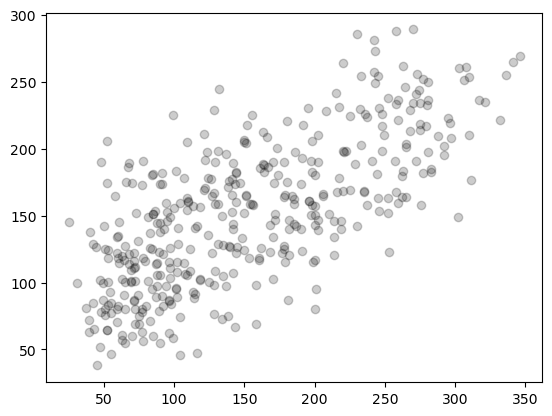

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train,y_train_pred)
print(r2)
plt.scatter(y_train, y_train_pred, color='black', alpha=0.2);

##### Adjusted $R^2$

<p>A disadvantage of using $R^2$ is that if comparing regression models, of numerous variables, the addition of new variables will increase the $R^2$ value of that model on that data, while perhaps detracting from its ability to predict for unseen data. An alternative which penalizes for the number of predictors is the adjusted $R^2$.</p>

<p>$$\bar{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1}$$</p>
    <ul>
        <li>$\bar{R}^2$ is adjusted $R^2$</li>
        <li>$R^2$ is the familiar coefficient of determination</li>
        <li>$n$ is the sample size</li>
        <li>$p$ is the number of parameters</li>
    </ul>

Adjusted $R^2$ can be implemented as follows:

In [17]:
n = len(X_train)
p = np.shape(X_train)[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.4864609642346883

##### Cross-Validation

<p>Cross-validation is an approach to estimate performance of a machine learning algorithm with less variance than a single train/test split, and mitigate overfitting by training a model upon several subsets of the input data, and evaluating them each time on a complementary 'validation' subset.</p>

<p>It splits the dataset into $k$ parts, calling each part of the data a fold. The algorithm is trained on $k$-1 folds with one held back for testing each time. This results in $k$ different scores that can be summarized in terms of average and standard deviation.</p>

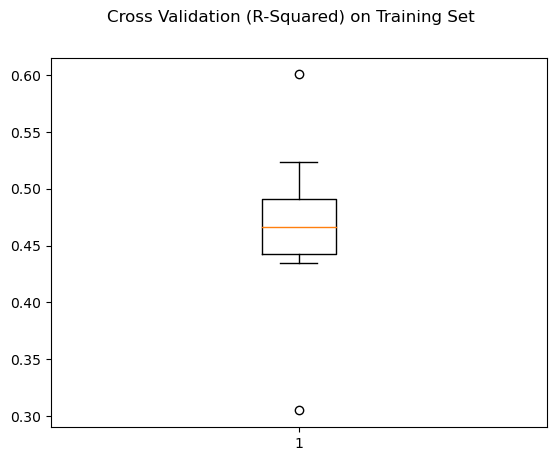

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

fig = plt.figure()
fig.suptitle('Cross Validation (R-Squared) on Training Set')
plt.boxplot(cv_results)
plt.show()

##### Test Set Performance

We want to utilize our test set of data, to determine how well the model generalizes toward data it hasn't seen.

0.6856851417427134


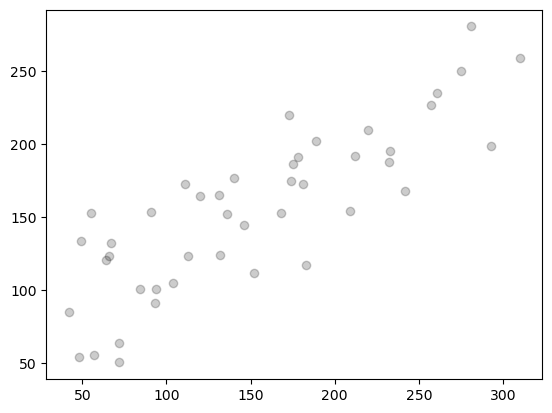

In [19]:
y_test_pred = model.predict(X_test)

r2 = r2_score(y_test,y_test_pred)
print(r2)
plt.scatter(y_test, y_test_pred, color='black', alpha=0.2);

We see that it performs quite well on the test set. Data splitting and cross-validation are particularly important when the model has parameters which require adjustment.

# Penalized Linear Regression

## Ridge Regression

<p>Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model, measured as the sum of the squared value of the coefficient values (a.k.a. the $L2$ norm). It thereby adds a penalty on the sum of the squared regression parameters:</p>

<p>$$SSE_{L_2} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^P \beta_j^2$$</p>

<p>The effect of this penalty is that the parameter estimates are only allowed to become large if there is a proportional reduction in SSE. Under cross-validation, the penalty (lambda) value can be optimized.</p>

##### Plot Coefficients by Penalty Level

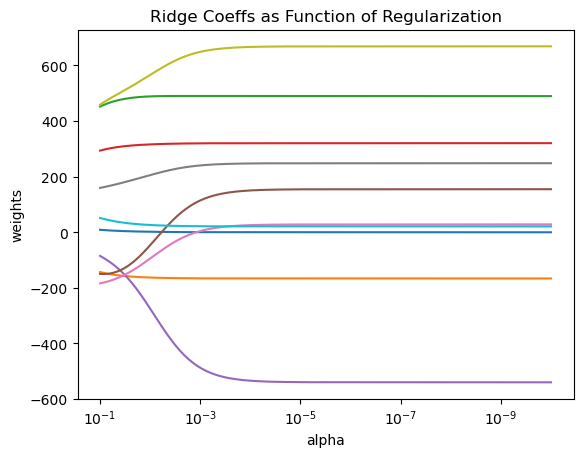

In [20]:
from sklearn import linear_model

n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge Coeffs as Function of Regularization")
plt.axis("tight")
plt.show()

##### Cross-Validate to Determine Penalty Level

1.0: -3540.618608 (813.884080)
0.5: -3322.575127 (688.200668)
0.1: -3188.502964 (497.539429)
0.05: -3187.663195 (464.730386)
0.01: -3190.654371 (440.233162)
0.005: -3190.943804 (438.944074)
0.001: -3193.075017 (440.590842)


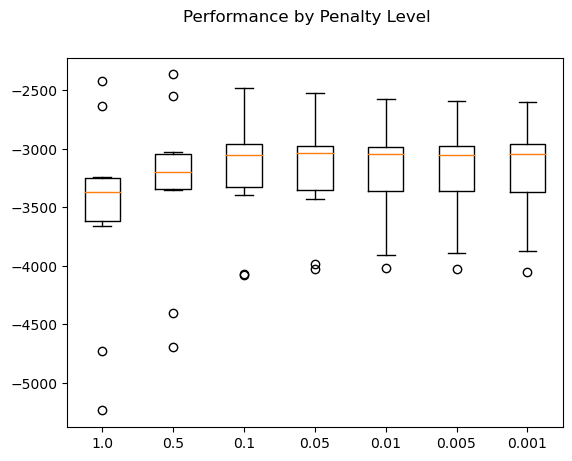

In [21]:
model = linear_model.Ridge()
alphas = [10e-1, 5e-1, 10e-2, 5e-2, 10e-3, 5e-3, 10e-4]
results = []

for a in alphas:
    model.alpha = a
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (a, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Performance by Penalty Level')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(alphas)
plt.show()

## Lasso Regression

<p>An alternative to Ridge regression is the LASSO (Least Absolute Shrinkage and Selection Operator) method, which uses a similar penalty to ridge regression. LASSO is a modification of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum of the absolute values of coefficient values (a.k.a. the $L1$ norm).</p>

<p>$$SSE_{L_1} = \sum_{i=1}^n (y_i - \hat{y})^2 + \lambda \sum_{j=1}^P |B_j|$$</p>

##### Plot Coefficients by Penalty Level

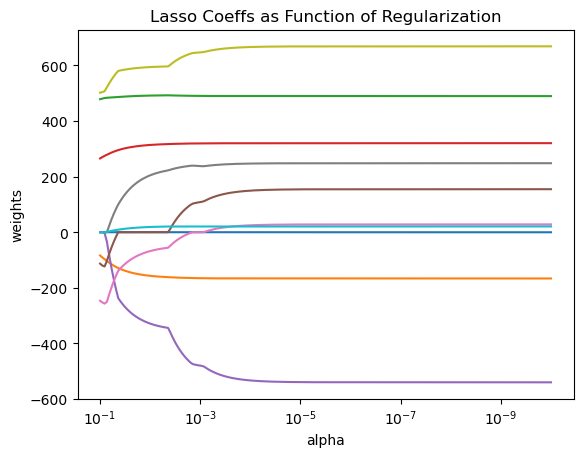

In [22]:
import warnings
warnings.filterwarnings("ignore")

n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso Coeffs as Function of Regularization")
plt.axis("tight")
plt.show()

##### Cross-Validate to Determine Penalty Level

1.0: -4015.164855 (850.215350)
0.5: -3491.108979 (675.729639)
0.1: -3219.955054 (495.441869)
0.05: -3194.782991 (463.537620)
0.01: -3196.679598 (439.373089)
0.005: -3190.477322 (436.425814)
0.001: -3193.576911 (440.832302)


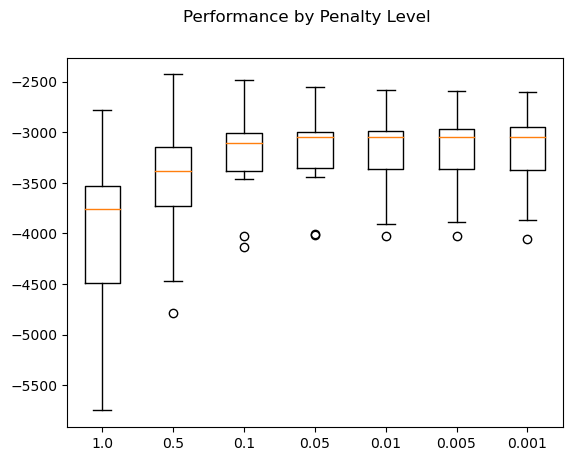

In [23]:
model = linear_model.Lasso()
alphas = [10e-1, 5e-1, 10e-2, 5e-2, 10e-3, 5e-3, 10e-4]
results = []

for a in alphas:
    model.alpha = a
    model.fit(X_train, X_train)
    kfold = KFold(n_splits=10, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (a, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Performance by Penalty Level')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(alphas)
plt.show()

## Elastic-Net Regression

<p>Elastic-Net is a form of regularization that combines the properties of both Ridge and LASSO. It penalizes complexity using the $L2$-norm (sum of squared coefficient values) and $L1$-norm (sum of absolute coefficient values) together.</p>

<p>$$SSE_{Enet} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^P \beta_j^2 + \lambda \sum_{j=1}^P |B_j|$$</p>

##### Plot Coefficients by Penalty Level

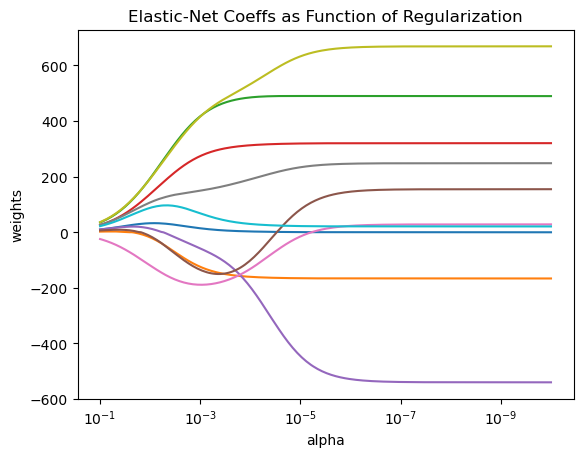

In [24]:
import warnings
warnings.filterwarnings("ignore")

n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

coefs = []
for a in alphas:
    enet = linear_model.ElasticNet(alpha=a, fit_intercept=False)
    enet.fit(X_train, y_train)
    coefs.append(enet.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Elastic-Net Coeffs as Function of Regularization")
plt.axis("tight")
plt.show()

##### Cross-Validate to Determine Penalty Level

1.0: -5938.442224 (1115.771519)
0.5: -5865.600545 (1113.801000)
0.1: -5389.911699 (1097.136210)
0.05: -4977.758564 (1074.596827)
0.01: -3838.114116 (915.680243)
0.005: -3498.473230 (794.443245)
0.001: -3202.238002 (545.766588)
0.0001: -3190.249042 (444.260051)
1e-05: -3192.225541 (439.843068)


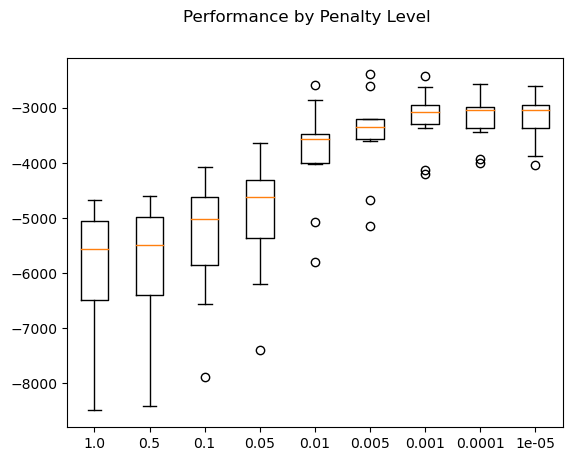

In [25]:
model = linear_model.ElasticNet()
alphas = [10e-1, 5e-1, 10e-2, 5e-2, 10e-3, 5e-3, 10e-4, 10e-5, 10e-6]
results = []

for a in alphas:
    model.alpha = a
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=10, shuffle=True, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (a, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Performance by Penalty Level')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(alphas)
plt.show()